## Show how to use matplotlib and basemap for map plotting
- many other python packages rely on basemap for plotting maps; 
- they usually have predefined defaults that may be more suitable for your data
- Basemap can be customized but defaults settings are usually insufficient to make "nice" plots

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap, shiftgrid

## Open netCDF file containing Vorticity at 850 hPa
- print metadata to get more information on data (variable dimensions, list of variables, etc.)

In [2]:
import numpy as np
import netCDF4
f = netCDF4.Dataset('EI_VO_850hPa_Summer2001.nc', 'r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Thu Feb 04 14:28:54 2016: cdo -t ecmwf -f nc copy EI_VO.grb EI_VO.nc
    institution: European Centre for Medium-Range Weather Forecasts
    CDO: Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(512), lat(256), lev(1), time(368)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 lev(lev), float64 time(time), float32 VO(time,lev,lat,lon)
    groups: 



## Read all latitudes, longitudes values and vorticity at time=0 and lev=0 (850 hPa)

In [3]:
lats = f.variables['lat'][:]
lons = f.variables['lon'][:]
VO = f.variables['VO'][0,0,:,:]*100000

In [4]:
print(lats.min(),lats.max())

-89.4628215686 89.4628215686


In [5]:
print(lons.min(), lons.max())

0.0 359.296875


In [6]:
VO, lons = shiftgrid(180., VO, lons, start=False)

In [7]:
print(lons.min(), lons.max())

-180.0 179.296875


In [8]:
lons.shape

(512,)

In [9]:
lats.shape

(256,)

In [10]:
VO.shape

(256, 512)

## Create a regular grid for latitudes and longitudes
- to get a (latitude,longitude) for each vorticity point

In [11]:
llons, llats = np.meshgrid(lons,lats)

In [12]:
print(llons.shape)
print(llats.shape)

(256, 512)
(256, 512)


# Plot VO on a map
- Define a basemap object called map with a cylindrical map projection
- Creates coastlines in map projection coordinates
- Plot parallels and meridians
- Choose colors for filling continents
- Define a list of values and colors for each interval


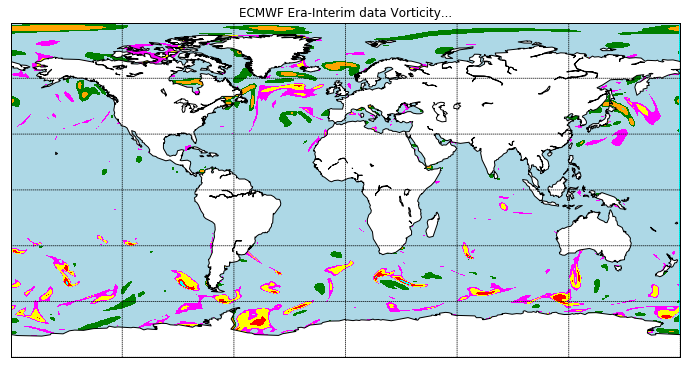

In [13]:
from matplotlib import colors as c
fig = plt.figure(figsize=[12,15])
ax = fig.add_subplot(1,1,1)
ax.set_title("ECMWF Era-Interim data Vorticity...")

map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180, ax=ax)
map.drawcoastlines()
map.fillcontinents(color='white',lake_color='white')
# draw parallels and meridians.
map.drawparallels(np.arange(-90.,91.,30.))
map.drawmeridians(np.arange(-180.,181.,60.))
map.drawmapboundary(fill_color='aqua')
bounds = [-20, -10, -7, -5, -3, 3, 5, 7, 10, 20]
cmap = c.ListedColormap(['blue','red', 'yellow', 'magenta', 'lightblue', 'green', 'lightgreen', 'orange'])

# llons and llats need to be projected on map
x, y = map(llons, llats)

# plot VO as filled contour where levels are chosen as well as the list of colors given
cs = map.contourf(x,y,VO, levels=bounds, cmap=cmap)